## Support Vector Machines - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("cement_slump.csv")

In [3]:
df.head()

Cement    Slag  Fly ash   Water     SP  Coarse Aggr.  Fine Aggr.  \
0 273.000  82.000  105.000 210.000  9.000       904.000     680.000   
1 163.000 149.000  191.000 180.000 12.000       843.000     746.000   
2 162.000 148.000  191.000 179.000 16.000       840.000     743.000   
3 162.000 148.000  190.000 179.000 19.000       838.000     741.000   
4 154.000 112.000  144.000 220.000 10.000       923.000     658.000   

   SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0     23.000    62.000                              34.990  
1      0.000    20.000                              41.140  
2      1.000    20.000                              41.810  
3      3.000    21.500                              42.080  
4     20.000    64.000                              26.820

### Exploratory Data Analysis and Visualization

In [4]:
df.describe().T

count    mean    std     min     25%  \
Cement                             103.000 229.894 78.877 137.000 152.000   
Slag                               103.000  77.974 60.461   0.000   0.050   
Fly ash                            103.000 149.015 85.418   0.000 115.500   
Water                              103.000 197.168 20.208 160.000 180.000   
SP                                 103.000   8.540  2.808   4.400   6.000   
Coarse Aggr.                       103.000 883.979 88.391 708.000 819.500   
Fine Aggr.                         103.000 739.605 63.342 640.600 684.500   
SLUMP(cm)                          103.000  18.049  8.751   0.000  14.500   
FLOW(cm)                           103.000  49.611 17.569  20.000  38.500   
Compressive Strength (28-day)(Mpa) 103.000  36.039  7.837  17.190  30.900   

                                       50%     75%      max  
Cement                             248.000 303.900  374.000  
Slag                               100.000 125.000  193.000  
Fly ash                            164.000 235.950  260.000  
Water                              196.000 209.500  240.000  
SP                                   8.000  10.000   19.000  
Coarse Aggr.                       879.000 952.800 1049.900  
Fine Aggr.                         742.700 788.000  902.000  
SLUMP(cm)                           21.500  24.000   29.000  
FLOW(cm)                            54.000  63.750   78.000  
Compressive Strength (28-day)(Mpa)  35.520  41.205   58.530

<AxesSubplot:>

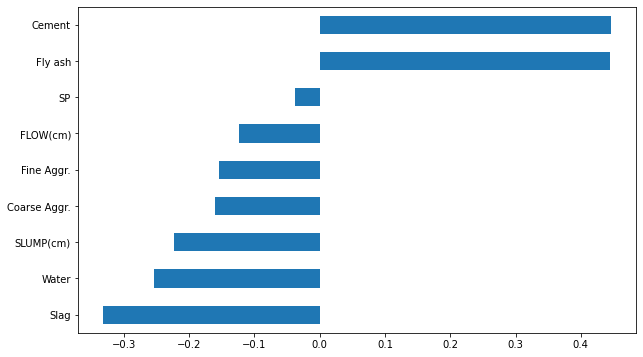

In [5]:
df.corr()['Compressive Strength (28-day)(Mpa)'].drop('Compressive Strength (28-day)(Mpa)').sort_values().plot.barh()

<AxesSubplot:>

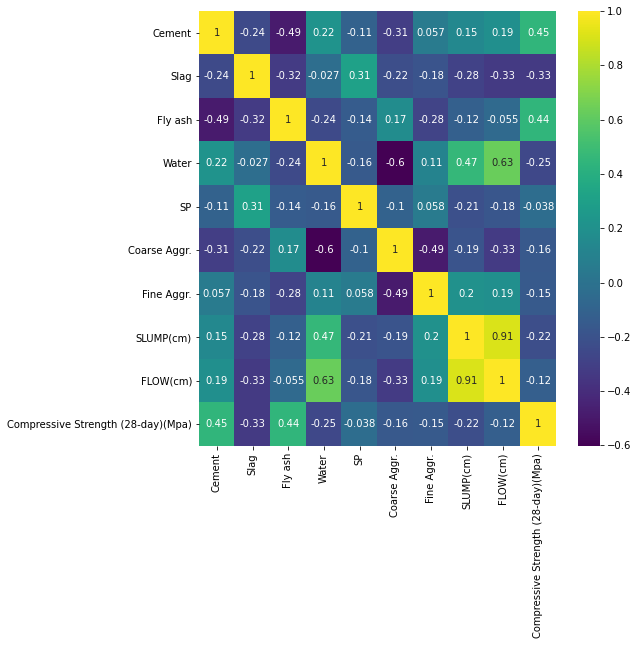

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

### Train | Test Split and Scaling

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling and Model Performance

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [13]:
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

### With Default Parameters

In [14]:
svr_model = SVR()

In [15]:
svr_model.fit(X_train_scaled,y_train)

SVR()

In [16]:
y_pred = svr_model.predict(X_test_scaled)

In [17]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [18]:
eval_metric(y_test, y_pred)

r2_score: 0.3452342238922179 
mae: 5.236902091259179 
mse: 44.835275522129486 
rmse: 6.695914838327134


### Cross Validate

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
model = SVR()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2',
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_r2                              0.221
test_neg_mean_absolute_error        -4.667
test_neg_mean_squared_error        -37.826
test_neg_root_mean_squared_error    -5.784
dtype: float64

### With Best Parameters (GridsearchCV)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [23]:
model = SVR()
svr_grid_model = GridSearchCV(model, param_grid=param_grid, verbose=3, refit=True)

In [24]:
svr_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=linear;, score=-0.044 total time=   0.0s
[CV 2/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=linear;, score=-0.052 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=linear;, score=0.007 total time=   0.0s
[CV 4/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=linear;, score=-0.139 total time=   0.0s
[CV 5/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=linear;, score=0.007 total time=   0.0s
[CV 1/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 2/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 3/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.001, degree=2, epsilon=0, gamma=scale, kernel=rbf;, score=-0.147 total time=   0.0s
[CV 5/5] END C=

[CV 4/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.147 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.051 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.054 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.147 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.001 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.044 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.052 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, epsilon=0.01, gamma=auto, 

[CV 3/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=0.007 total time=   0.0s
[CV 4/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=-0.139 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=0.007 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.048 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.056 total time=   0.0s
[CV 3/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=-0.147 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.047 total time=   0.0s
[CV 2/5] END C=0.001, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score

[CV 3/5] END C=0.01, degree=2, epsilon=0.5, gamma=auto, kernel=poly;, score=-0.000 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=0.5, gamma=auto, kernel=poly;, score=-0.124 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, epsilon=0.5, gamma=auto, kernel=poly;, score=0.004 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.022 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.005 total time=   0.0s
[CV 3/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.064 total time=   0.0s
[CV 4/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=linear;, score=-0.065 total time=   0.0s
[CV 5/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=linear;, score=0.064 total time=   0.0s
[CV 1/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END C=0.01, degree=2, epsilon=1, gamma=scale, kernel=rbf;, score=-0.059 tot

[CV 4/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=rbf;, score=-0.142 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=rbf;, score=0.004 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=poly;, score=-0.054 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=poly;, score=-0.067 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=poly;, score=0.002 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=poly;, score=-0.142 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, epsilon=2, gamma=scale, kernel=poly;, score=0.010 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, epsilon=2, gamma=auto, kernel=linear;, score=0.013 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, epsilon=2, gamma=auto, kernel=linear;, score=-0.006 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, epsilon=2, gamma=auto, kernel=linear;, score=0.063 total time=  

[CV 1/5] END C=0.1, degree=2, epsilon=0, gamma=auto, kernel=poly;, score=-0.030 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0, gamma=auto, kernel=poly;, score=-0.056 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0, gamma=auto, kernel=poly;, score=-0.007 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0, gamma=auto, kernel=poly;, score=-0.117 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, epsilon=0, gamma=auto, kernel=poly;, score=0.062 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.534 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.422 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.319 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.492 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.453 total

[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.039 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-0.097 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.044 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.040 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.053 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.016 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.082 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=0.096 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=0.531 total ti

[CV 4/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=linear;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=linear;, score=0.474 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=rbf;, score=0.039 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=rbf;, score=-0.075 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=rbf;, score=0.043 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=poly;, score=-0.012 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=poly;, score=-0.050 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, epsilon=0.5, gamma=auto, kernel=poly;, score=-0.004 total time=   

[CV 5/5] END C=0.5, degree=2, epsilon=1, gamma=auto, kernel=poly;, score=0.201 total time=   0.0s
[CV 1/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=linear;, score=0.871 total time=   0.0s
[CV 2/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=linear;, score=0.565 total time=   0.0s
[CV 4/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=linear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=linear;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=rbf;, score=0.097 total time=   0.0s
[CV 2/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=rbf;, score=0.072 total time=   0.0s
[CV 3/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=rbf;, score=0.182 total time=   0.0s
[CV 4/5] END C=0.5, degree=2, epsilon=2, gamma=scale, kernel=rbf;, score=0.036 total time=   0.0s
[CV 5

[CV 2/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=linear;, score=0.535 total time=   0.0s
[CV 4/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=linear;, score=0.817 total time=   0.0s
[CV 1/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=rbf;, score=0.119 total time=   0.0s
[CV 2/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=rbf;, score=0.073 total time=   0.0s
[CV 3/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=rbf;, score=0.199 total time=   0.0s
[CV 4/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=rbf;, score=0.097 total time=   0.0s
[CV 5/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=rbf;, score=0.204 total time=   0.0s
[CV 1/5] END C=0.5, degree=4, epsilon=0, gamma=scale, kernel=poly;, score=0.010 total time=   0.0s
[CV 2/5

[CV 2/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.858 total time=   0.0s
[CV 3/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.443 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.766 total time=   0.0s
[CV 5/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.251 total time=   0.0s
[CV 2/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.212 total time=   0.0s
[CV 3/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.381 total time=   0.0s
[CV 4/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.273 total time=   0.0s
[CV 5/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.369 total time=   0.0s
[CV 1/5] END C=1, degree=2, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.008 total time=   0

[CV 2/5] END C=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.160 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.222 total time=   0.0s
[CV 4/5] END C=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.234 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.488 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=linear;, score=0.908 total time=   0.0s
[CV 2/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=linear;, score=0.396 total time=   0.0s
[CV 4/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=linear;, score=0.793 total time=   0.0s
[CV 5/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=linear;, score=0.826 total time=   0.0s
[CV 1/5] END C=1, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=0.248 total time=   0.0s
[

[CV 3/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=0.396 total time=   0.0s
[CV 4/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=0.793 total time=   0.0s
[CV 5/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=linear;, score=0.826 total time=   0.0s
[CV 1/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.251 total time=   0.0s
[CV 2/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.208 total time=   0.0s
[CV 3/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.377 total time=   0.0s
[CV 4/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.271 total time=   0.0s
[CV 5/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=rbf;, score=0.369 total time=   0.0s
[CV 1/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.043 total time=   0.0s
[CV 2/5] END C=1, degree=4, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.173 total time=   0.0s
[CV 3/5] END C=1,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [25]:
svr_grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [26]:
y_pred_grid = svr_grid_model.predict(X_test_scaled)

In [27]:
eval_metric(y_test, y_pred_grid)

r2_score: 0.8524866277808454 
mae: 2.512801221076172 
mse: 10.10102074356973 
rmse: 3.178210305119806


In [28]:
eval_metric(y_test, y_pred)

r2_score: 0.3452342238922179 
mae: 5.236902091259179 
mse: 44.835275522129486 
rmse: 6.695914838327134
